## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
%load_ext lab_black
from src.perspective import Calibration
import glob
import cv2
import numpy as np

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from main import LaneDetectionPipeline

test model calibration

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# plt.imshow(binary1, cmap="gray")

## And so on and so forth...

In [15]:
test_img = glob.glob("test_images/*.jpg")[4]
img = mpimg.imread(test_img)
lane = LaneDetectionPipeline(
    gradient_params=dict(
        sobel_kernel_size=3,
        sobel_threshold=(70, 100),
        magnitude_threshold=(90, 255),
        direction_threshold=(0.7, 1.3),
    ),
    color_params=dict(s_thresholds=(150, 255), r_thresholds=(200, 255)),
    lane_detect_params=dict(
        num_windows=9,
        window_margin=50,
        min_pixels=50,
        fit_tolerance=100,
    ),
    annotate_params=dict(
        line_width=50,
        lane_colors=[(0, 0, 255), (255, 0, 0)],
        road_region_color=(0, 255, 0),
    ),
    line_object_params=dict(cache_size=15),
)
res_frame = lane.process_frame(img)

In [17]:
test_img

'test_images/test3.jpg'

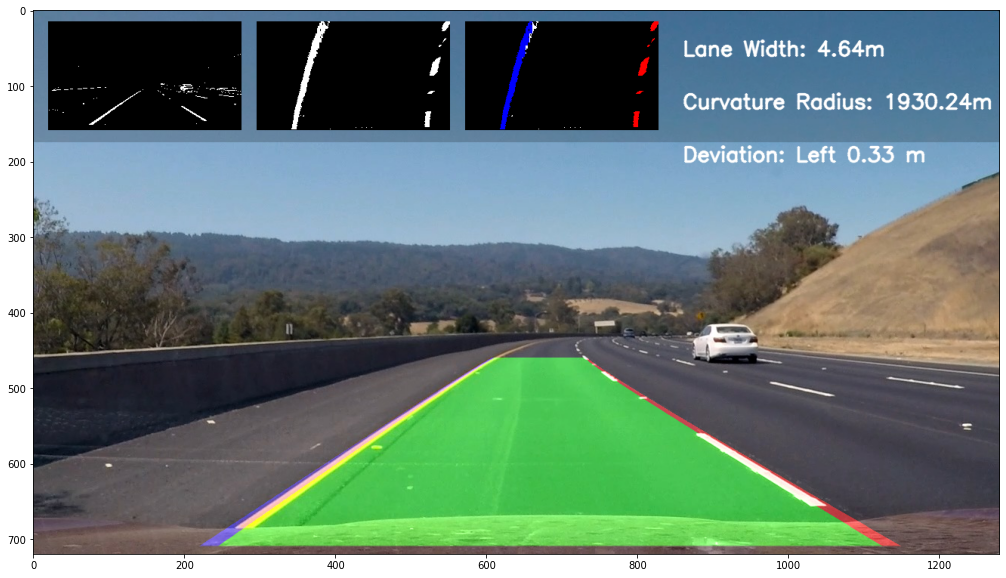

In [16]:
plt.figure(figsize=(20, 10))
plt.imshow(res_frame)
plt.imsave("examples/color_filter.jpg", res_frame）

Test on videos

In [5]:
lane = LaneDetectionPipeline(
    gradient_params=dict(
        sobel_kernel_size=3,
        sobel_threshold=(70, 100),
        magnitude_threshold=(90, 255),
        direction_threshold=(0.7, 1.3),
    ),
    color_params=dict(s_thresholds=(150, 255), r_thresholds=(200, 255)),
    lane_detect_params=dict(
        num_windows=9,
        window_margin=50,
        min_pixels=50,
        fit_tolerance=100,
    ),
    annotate_params=dict(
        line_width=50,
        lane_colors=[(0, 0, 255), (255, 0, 0)],
        road_region_color=(0, 255, 0),
    ),
    line_object_params=dict(cache_size=15),
)

project_output = "test_videos_output/project_video.mp4"

clip3 = VideoFileClip("test_videos/project_video.mp4")
project_clip = clip3.fl_image(lane.process_frame)
%time project_clip.write_videofile(project_output, audio=False)

t:   0%|          | 2/1260 [00:00<01:29, 14.10it/s, now=None]

Moviepy - Building video test_videos_output/project_video.mp4.
Moviepy - Writing video test_videos_output/project_video.mp4



t:  26%|██▌       | 330/1260 [00:46<02:17,  6.76it/s, now=None]

KeyboardInterrupt: 

In [6]:
HTML(
    """
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(
        project_output
    )
)